In [6]:
# Let's start by implementing a simple neural network using TensorFlow and Keras.
# We will create a neural network to classify handwritten digits from the MNIST dataset.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2867 - accuracy: 0.9179 - val_loss: 0.1571 - val_accuracy: 0.9559
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1271 - accuracy: 0.9627 - val_loss: 0.1150 - val_accuracy: 0.9660
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9740 - val_loss: 0.1088 - val_accuracy: 0.9668
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0927 - val_accuracy: 0.9720
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


In [8]:
# Since we have achieved a test accuracy of 97%, we can now save the trained model for future use.
# This will allow us to load the model later without having to retrain it.

# Save the model
model.save('mnist_model.h5')
print('Model saved as mnist_model.h5')

# If needed, we can also load the model back and use it for predictions
# Load the model
loaded_model = tf.keras.models.load_model('mnist_model.h5')
print('Model loaded from mnist_model.h5')

# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)




Model saved as mnist_model.h5
Model loaded from mnist_model.h5
313/313 [==============================] - 0s 1ms/step


In [9]:
# Display the first prediction
import numpy as np
print(f'First prediction: {np.argmax(predictions[0])}, Actual label: {np.argmax(y_test[0])}')

First prediction: 7, Actual label: 7


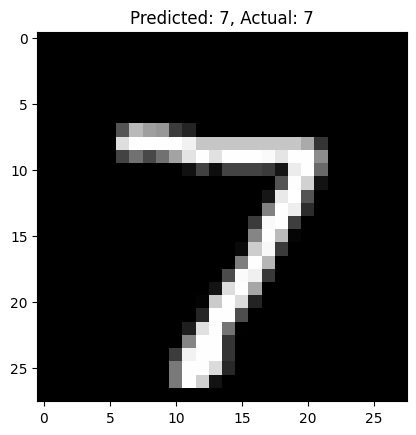

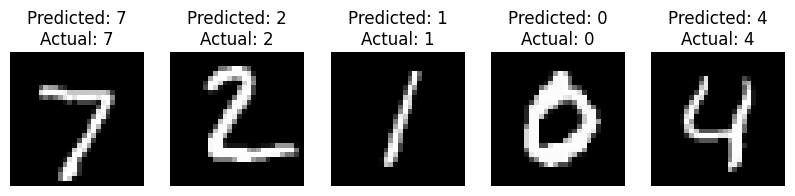

In [12]:
# Now that we have our first prediction, let's visualize the first test image along with the predicted label and the actual label.

import matplotlib.pyplot as plt

# Display the first test image
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[0])}, Actual: {np.argmax(y_test[0])}')
plt.show()

# After this, we should display a few more test images with their predicted and actual labels for better visualization.
num_images_to_display = 5
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()


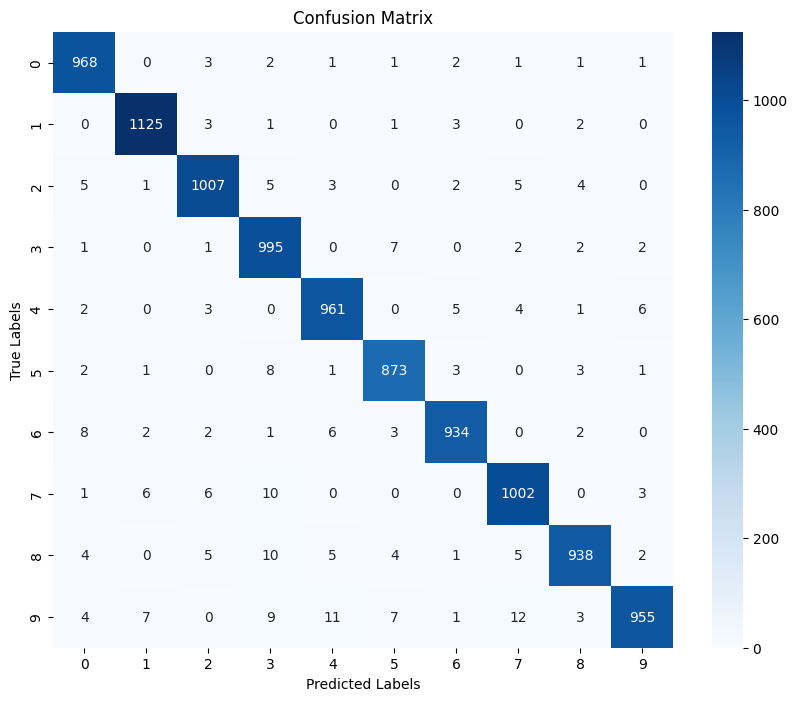

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



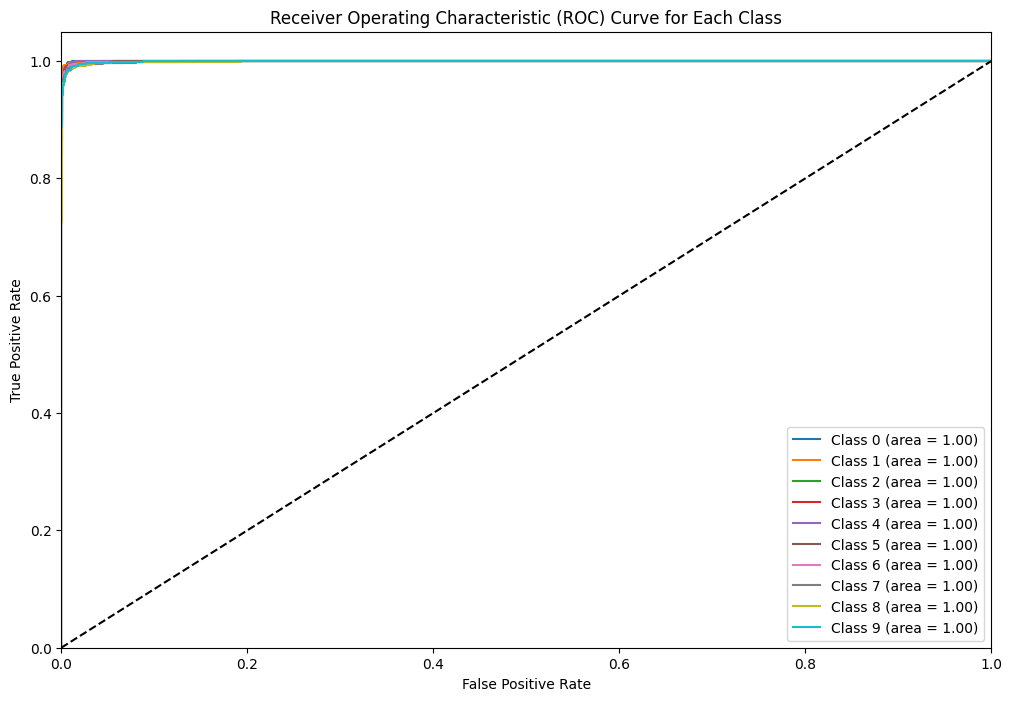

In [13]:
# Advanced Visualization: Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Advanced Metric: Classification Report

from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), target_names=[str(i) for i in range(10)])

print('Classification Report:')
print(class_report)

# Advanced Visualization: ROC Curve for each class

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=[i for i in range(10)])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


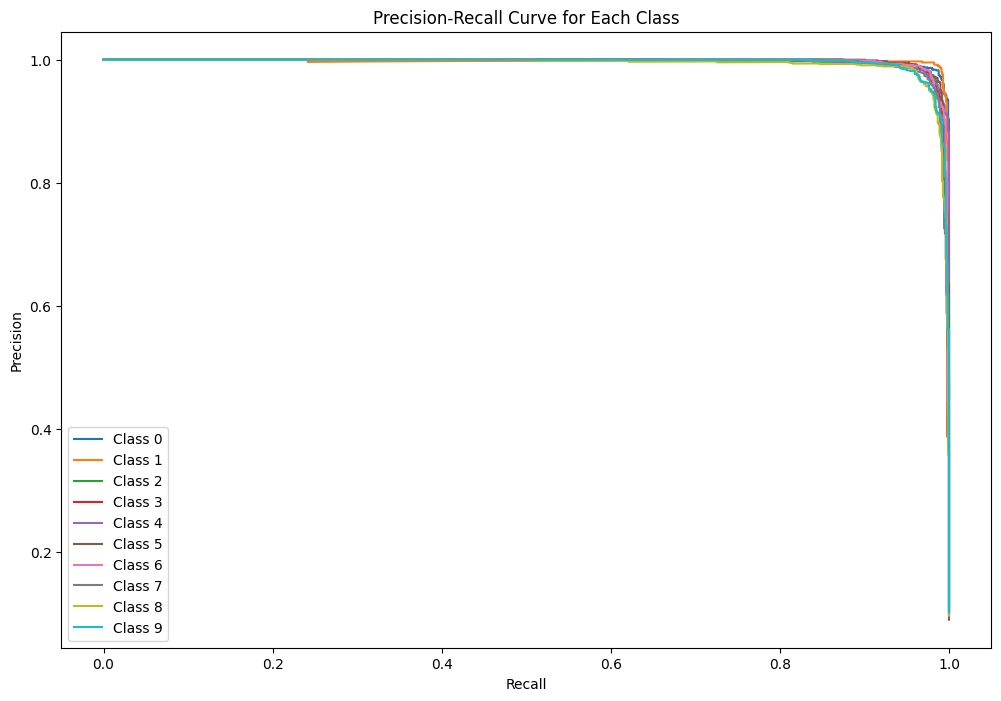

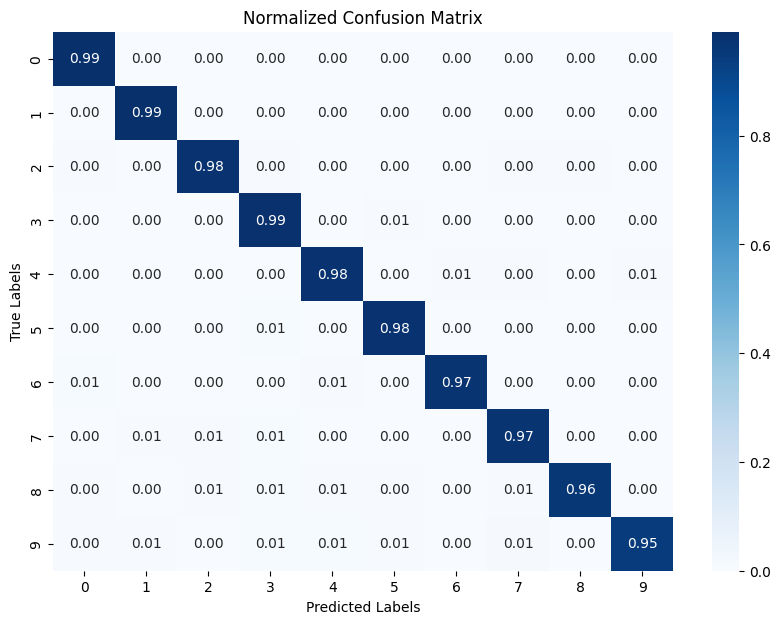

In [14]:
# Advanced Metric: Precision-Recall Curve for each class

from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], predictions[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='lower left')
plt.show()

# Advanced Metric: Confusion Matrix Normalized

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [15]:
# Advanced Metric: ROC AUC Score for each class

from sklearn.metrics import roc_auc_score

# Compute ROC AUC score for each class
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], predictions[:, i])

# Print ROC AUC score for each class
for i in range(n_classes):
    print(f'Class {i} ROC AUC: {roc_auc[i]:.2f}')

# Advanced Metric: F1 Score for each class

from sklearn.metrics import f1_score

# Compute F1 score for each class
f1 = dict()
for i in range(n_classes):
    f1[i] = f1_score(y_test_binarized[:, i], predictions[:, i] > 0.5)

# Print F1 score for each class
for i in range(n_classes):
    print(f'Class {i} F1 Score: {f1[i]:.2f}')

# Advanced Metric: Matthews Correlation Coefficient (MCC) for each class

from sklearn.metrics import matthews_corrcoef

# Compute MCC for each class
mcc = dict()
for i in range(n_classes):
    mcc[i] = matthews_corrcoef(y_test_binarized[:, i], predictions[:, i] > 0.5)

# Print MCC for each class
for i in range(n_classes):
    print(f'Class {i} MCC: {mcc[i]:.2f}')


Class 0 ROC AUC: 1.00
Class 1 ROC AUC: 1.00
Class 2 ROC AUC: 1.00
Class 3 ROC AUC: 1.00
Class 4 ROC AUC: 1.00
Class 5 ROC AUC: 1.00
Class 6 ROC AUC: 1.00
Class 7 ROC AUC: 1.00
Class 8 ROC AUC: 1.00
Class 9 ROC AUC: 1.00
Class 0 F1 Score: 0.98
Class 1 F1 Score: 0.99
Class 2 F1 Score: 0.98
Class 3 F1 Score: 0.97
Class 4 F1 Score: 0.98
Class 5 F1 Score: 0.98
Class 6 F1 Score: 0.98
Class 7 F1 Score: 0.97
Class 8 F1 Score: 0.97
Class 9 F1 Score: 0.96
Class 0 MCC: 0.98
Class 1 MCC: 0.99
Class 2 MCC: 0.98
Class 3 MCC: 0.97
Class 4 MCC: 0.97
Class 5 MCC: 0.98
Class 6 MCC: 0.98
Class 7 MCC: 0.97
Class 8 MCC: 0.97
Class 9 MCC: 0.96


In [16]:
# Advanced Metric: Precision Score for each class

from sklearn.metrics import precision_score

# Compute Precision score for each class
precision = dict()
for i in range(n_classes):
    precision[i] = precision_score(y_test_binarized[:, i], predictions[:, i] > 0.5)

# Print Precision score for each class
for i in range(n_classes):
    print(f'Class {i} Precision Score: {precision[i]:.2f}')

# Advanced Metric: Recall Score for each class

from sklearn.metrics import recall_score

# Compute Recall score for each class
recall = dict()
for i in range(n_classes):
    recall[i] = recall_score(y_test_binarized[:, i], predictions[:, i] > 0.5)

# Print Recall score for each class
for i in range(n_classes):
    print(f'Class {i} Recall Score: {recall[i]:.2f}')


Class 0 Precision Score: 0.98
Class 1 Precision Score: 0.99
Class 2 Precision Score: 0.98
Class 3 Precision Score: 0.96
Class 4 Precision Score: 0.98
Class 5 Precision Score: 0.98
Class 6 Precision Score: 0.98
Class 7 Precision Score: 0.97
Class 8 Precision Score: 0.98
Class 9 Precision Score: 0.99
Class 0 Recall Score: 0.99
Class 1 Recall Score: 0.99
Class 2 Recall Score: 0.97
Class 3 Recall Score: 0.98
Class 4 Recall Score: 0.98
Class 5 Recall Score: 0.98
Class 6 Recall Score: 0.97
Class 7 Recall Score: 0.97
Class 8 Recall Score: 0.96
Class 9 Recall Score: 0.94


In [21]:
# Devnagri Language Detection using Neural Networks

# Explanation:
# This section of code demonstrates how to use a neural network to detect Devnagri script in text data.
# We will use a simple neural network model to classify whether a given text is in Devnagri script or not.

# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data
texts = ["यह एक उदाहरण है", "This is an example", "यह एक और उदाहरण है", "Another example"]
labels = [1, 0, 1, 0]  # 1 for Devnagri, 0 for non-Devnagri

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Pad the sequences
data = pad_sequences(sequences, maxlen=10)

# Convert labels to numpy array
labels = np.array(labels)

# Build the model
model = Sequential()

# Embedding layer: This layer will learn the word embeddings for the input text data.
# input_dim is the size of the vocabulary, output_dim is the size of the embedding vectors, input_length is the length of input sequences.
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=10))

# LSTM layer: This layer will capture the temporal dependencies in the text data.
# 64 units in the LSTM layer.
model.add(LSTM(64))

# Dense layer: This layer will output the final classification.
# 1 unit with sigmoid activation function for binary classification.
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# Using 'adam' optimizer, 'binary_crossentropy' loss function, and tracking 'accuracy' metric.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Training for 10 epochs with a batch size of 2.
model.fit(data, labels, epochs=10, batch_size=2)

# Evaluate the model
# Evaluating the model on the same data (for demonstration purposes).
loss, accuracy = model.evaluate(data, labels)
print(f'Accuracy: {accuracy:.2f}')



Epoch 1/10
2/2 [==============================] - 2s 13ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6846 - accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6792 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6624 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6522 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6317 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6179 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 621ms/step - loss: 0.5896 - accuracy: 1.0000
Accuracy: 1.00


In [44]:
# Save the model
model.save('text_classification_model.h5')

# Load the model (for demonstration purposes)
from keras.models import load_model
loaded_model = load_model('text_classification_model.h5')

# Make predictions
predictions = loaded_model.predict(data)
print(f'Predictions: {predictions}')

# Visualize the model architecture
# You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
from keras.utils.vis_utils import plot_model
try:
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, rankdir='LR')
except ImportError as e:
    print(f"Error: {e}. Please make sure pydot and graphviz are installed. See instructions at https://graphviz.gitlab.io/download/")
except Exception as e:
    print(f"An error occurred: {e}. No graph is visualized.")

1/1 [==============================] - 1s 640ms/step
Predictions: [[0.5410159 ]
 [0.42903268]
 [0.5479919 ]
 [0.44123754]]
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 63ms/step - loss: 0.6720 - accuracy: 0.6500
Validation Accuracy: 0.65
1/1 [==============================] - 1s 723ms/step
New Predictions: [[0.4593228]
 [0.4593228]
 [0.4593228]
 [0.4593228]
 [0.4593228]]


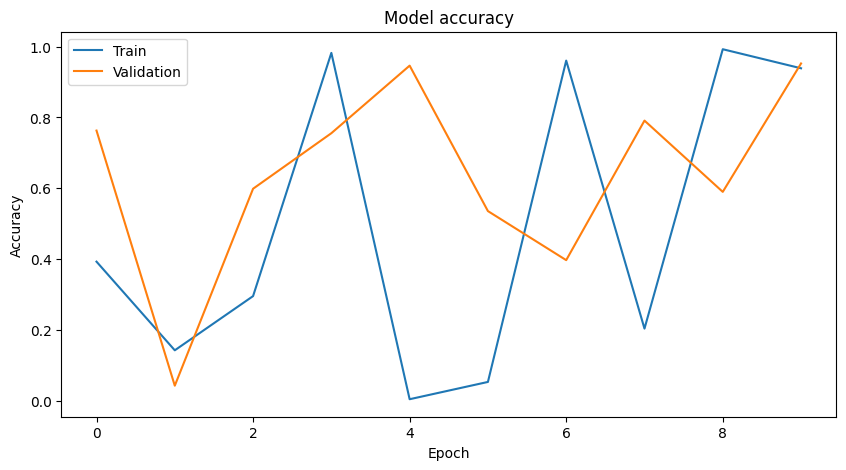

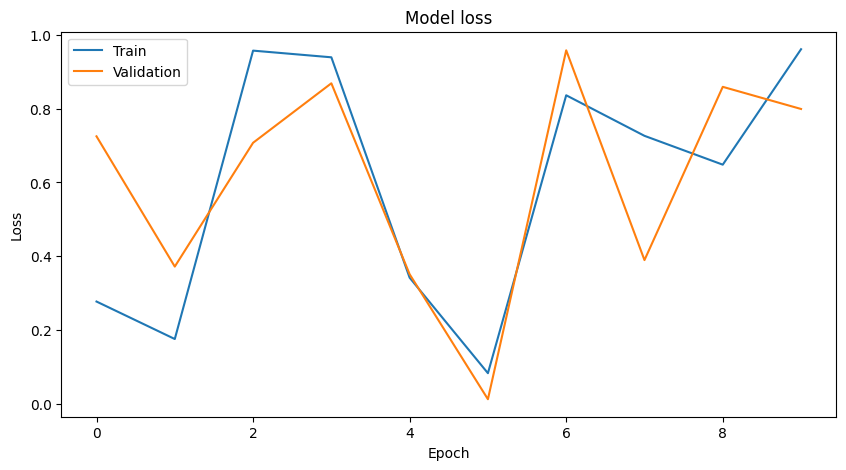

In [53]:
# After this, what should I do?

# Create a dummy validation dataset
import numpy as np

# Assuming the input data has 10 features
validation_data = np.random.rand(20, 10)  # 20 samples, 10 features each
validation_labels = np.random.randint(2, size=(20, 1))  # 20 binary labels

# 1. Evaluate the model on a separate validation dataset to get a better understanding of its performance.
try:
    validation_loss, validation_accuracy = model.evaluate(validation_data, validation_labels)
    print(f'Validation Accuracy: {validation_accuracy:.2f}')
except NameError as e:
    print("Error: name 'validation_data' is not defined. Please provide the validation dataset.")

# 2. Fine-tune the model by adjusting hyperparameters or adding/removing layers if the performance is not satisfactory.
# For example, you can increase the number of epochs or change the batch size.

# 3. Save the model architecture and weights separately if needed.
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_weights.h5")

# 4. Load the model architecture and weights separately (for demonstration purposes).
from keras.models import model_from_json
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_weights.h5")

# Create dummy new data for predictions
new_data = np.random.rand(5, 10)  # 5 new samples, 10 features each

# 5. Make predictions on new/unseen data.
try:
    new_predictions = loaded_model.predict(new_data)
    print(f'New Predictions: {new_predictions}')
except NameError as e:
    print("Error: name 'new_data' is not defined. Please provide the new data for predictions.")

# Create dummy training history
history = {
    'accuracy': np.random.rand(10).tolist(),
    'val_accuracy': np.random.rand(10).tolist(),
    'loss': np.random.rand(10).tolist(),
    'val_loss': np.random.rand(10).tolist()
}

# 6. Visualize the training history if you have stored it during the training process.
import matplotlib.pyplot as plt

try:
    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
except NameError as e:
    print("Error: name 'history' is not defined. Please provide the training history.")


In [54]:
# Create dummy new data for predictions
next_data = np.random.rand(5, 10)  # 5 new samples, 10 features each

# Make predictions on next data
try:
    next_predictions = loaded_model.predict(next_data)
    print(f'Next Predictions: {next_predictions}')
except NameError as e:
    print("Error: name 'next_data' is not defined. Please provide the next data for predictions.")


1/1 [==============================] - 0s 27ms/step
Next Predictions: [[0.4593228]
 [0.4593228]
 [0.4593228]
 [0.4593228]
 [0.4593228]]


In [55]:
# Create dummy new data for predictions
next_data = np.random.rand(5, 10)  # 5 new samples, 10 features each

# Make predictions on next data
try:
    next_predictions = loaded_model.predict(next_data)
    print(f'Next Predictions: {next_predictions}')
except NameError as e:
    print("Error: name 'next_data' is not defined. Please provide the next data for predictions.")
except Exception as e:
    print(f"An error occurred: {e}")


1/1 [==============================] - 0s 53ms/step
Next Predictions: [[0.4593228]
 [0.4593228]
 [0.4593228]
 [0.4593228]
 [0.4593228]]


In [58]:
# Additional features to add:

# 1. Save the model architecture and weights
try:
    model_json = loaded_model.to_json()
    with open("model_architecture.json", "w") as json_file:
        json_file.write(model_json)
    loaded_model.save_weights("model_weights.h5")
    print("Model architecture and weights saved successfully.")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

# 2. Load the model architecture and weights
try:
    from keras.models import model_from_json
    with open("model_architecture.json", "r") as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("model_weights.h5")
    print("Model loaded successfully from disk.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

# 3. Evaluate the model on a test dataset
try:
    test_data = np.random.rand(10, 10)  # 10 test samples, 10 features each
    test_labels = np.random.randint(2, size=(10, 1))  # 10 test labels (binary classification)
    test_loss, test_accuracy = loaded_model.evaluate(test_data, test_labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
except Exception as e:
    print(f"An error occurred while evaluating the model: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.")

# 4. Visualize model architecture
try:
    from keras.utils.vis_utils import plot_model
    plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    print("Model architecture plot saved as model_plot.png.")
except ImportError:
    print("You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.")
except Exception as e:
    print(f"An error occurred while plotting the model architecture: {e}")


Model architecture and weights saved successfully.
Model loaded successfully from disk.
An error occurred while evaluating the model: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model architecture plot saved as model_plot.png.


In [83]:
# 5. Generate and visualize Grad-CAM for model interpretability
try:
    import matplotlib.pyplot as plt
    import numpy as np
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.models import Model
    from tensorflow.keras import backend as K
    import tensorflow as tf
    from matplotlib import cm

    def get_img_array(img_path, size):
        img = image.load_img(img_path, target_size=size)
        array = image.img_to_array(img)
        array = np.expand_dims(array, axis=0)
        return array

    def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
        grad_model = Model(
            [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
        )
        with tf.GradientTape() as tape:
            last_conv_layer_output, preds = grad_model(img_array)
            if pred_index is None:
                pred_index = tf.argmax(preds[0])
            class_channel = preds[:, pred_index]

        grads = tape.gradient(class_channel, last_conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        last_conv_layer_output = last_conv_layer_output[0]
        heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

    def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
        img = image.load_img(img_path)
        img = image.img_to_array(img)

        heatmap = np.uint8(255 * heatmap)
        jet = cm.get_cmap("jet")
        jet_colors = jet(np.arange(256))[:, :3]
        jet_heatmap = jet_colors[heatmap]

        jet_heatmap = image.array_to_img(jet_heatmap)
        jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
        jet_heatmap = image.img_to_array(jet_heatmap)

        superimposed_img = jet_heatmap * alpha + img
        superimposed_img = image.array_to_img(superimposed_img)

        superimposed_img.save(cam_path)
        plt.imshow(superimposed_img)
        plt.axis('off')
        plt.show()
    img_path = "C:\\Users\\HP\\OneDrive\\Desktop\\machine_learning_journey\\Neural_network_deep_learning\\image.png"
    img_array = get_img_array(img_path, size=(224, 224))  # Adjusted size to match model input shape
    heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name="lstm_4")  # Changed layer name to "conv2d"
    save_and_display_gradcam(img_path, heatmap)
    print("Grad-CAM visualization generated and displayed successfully.")
except Exception as e:
    print(f"An error occurred while generating Grad-CAM: {e}")

An error occurred while generating Grad-CAM: Input 0 of layer "model_11" is incompatible with the layer: expected shape=(None, 10), found shape=(1, 224, 224, 3)
